In [2]:
#Cris Chou
#Cyc180001
#HW8
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\C\Desktop\school\CS 4375\hw8\Auto.csv") #switch to file location of Auto.csv
print(df.head())
print(df.shape)
print('\nDescrption of mpg, weight, and year\n', df.loc[:,['mpg','weight','year']].describe())
print("The range for mpg was from 9-46.6, for weight, 1613-5140, and for year, 70-82. The averages respectively, were 23.459, 2977.584, and 76.01 ")
print("\nThe data types for each column are \n", df.dtypes)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
(392, 9)

Descrption of mpg, weight, and year
               mpg       weight        year
count  392.000000   392.000000  390.000000
mean    23.445918  2977.584184   76.010256
std      7.805007   849.402560    3.668093
min      9.000000  1613.000000   70.000000
25%     17.000000  2225.250000   73.000000
50% 

In [4]:
#change using catecode
df.cylinders = df.cylinders.astype('category').cat.codes
df.origin = df.origin.astype('category')
print("\n After\n")
print(df.dtypes)


 After

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


In [5]:
#deleting NAs
df.dropna(inplace=True)
print(df.shape)

(389, 9)


In [6]:
#modify columns
averageMPG = df.mpg.mean()
df['mpg_high'] = np.where(df.mpg > averageMPG, 1,0)
df = df.drop(columns=['mpg', 'name'])
print(df.head())


   cylinders  displacement  horsepower  weight  acceleration  year origin  \
0          4         307.0         130    3504          12.0  70.0      1   
1          4         350.0         165    3693          11.5  70.0      1   
2          4         318.0         150    3436          11.0  70.0      1   
3          4         304.0         150    3433          12.0  70.0      1   
6          4         454.0         220    4354           9.0  70.0      1   

   mpg_high  
0         0  
1         0  
2         0  
3         0  
6         0  


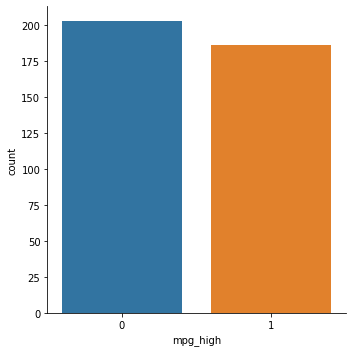

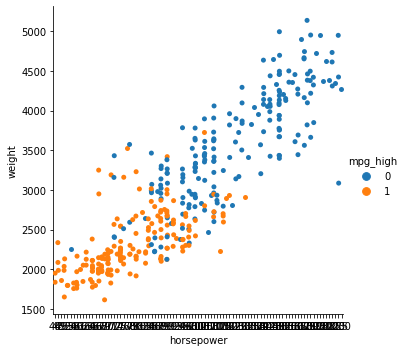

In [10]:
#data exploration with graphs

sns.catplot(x="mpg_high", kind="count", data=df)
#plt.show()
#in the data there is almost an even amount of cars with high and not high mpg
sns.catplot(x="horsepower", y="weight", hue = "mpg_high",data=df)
#plt.show()
#in the data it seems that cars with less mpg trend towards higher horsepower and heavier weight


<AxesSubplot:xlabel='mpg_high', ylabel='weight'>

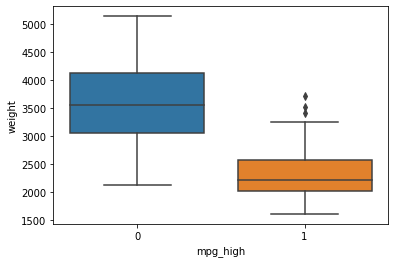

In [11]:
sns.boxplot(x = "mpg_high", y = "weight", data = df)
#plt.show()
#cars with lower mpg seem to average heavier weight

In [12]:
#train test
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:6]
y = df.iloc[:,7]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1234)
print("Train size", X_train.shape)
print("Test size", X_test.shape)

Train size (311, 6)
Test size (78, 6)


In [13]:
#Logistic regression
logreg = LogisticRegression(solver = "lbfgs")
logreg.fit(X_train,y_train)

logPred = logreg.predict(X_test)
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
print("mse= ", metrics.mean_squared_error(y_test,logPred))
print("correlation= ",metrics.r2_score(y_test,logPred))
print("Logistic Regression \n")
print(classification_report(y_test, logPred))

mse=  0.14102564102564102
correlation=  0.387142857142857
Logistic Regression 

              precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



Decision Tree: 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.87      0.93      0.90        28

    accuracy                           0.92        78
   macro avg       0.91      0.92      0.92        78
weighted avg       0.93      0.92      0.92        78



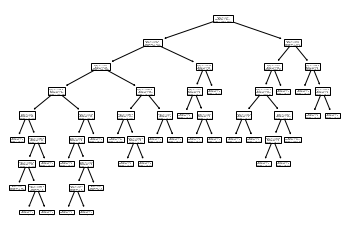

In [14]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
treePred = clf.predict(X_test)
print("Decision Tree: \n")
print(classification_report(y_test,treePred))
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [ ]:
'''
Analysis: 
The Logistic Regression had higher accuracy for predicting when a car did not have mpg_high. However for every other metric, 
Decision Tree out performed Logistic Regression in terms of accuracy. Thus the Decision Tree performed better than Logistic Regression. 
It performed better because the target was a binary factor. There were also a few outliers which probably resulted in underfitting, since
Logistic Regression is not flexible towards outliers.
'''